In [1]:
from utils.preprocess import set_b_dataset
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import librosa
import scipy
import librosa.display
from torch.utils.data import Dataset

PROJECT_DIR = '/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/'
data_a_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_a.csv')
data_b_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_b.csv')
data_a_timing = pd.read_csv(f'{PROJECT_DIR}dataset/set_a_timing.csv')

dataset = set_b_dataset(PROJECT_DIR)

/Users/nattapolchanpaisit/miniforge3/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


## Exploratory data analysis

In [2]:
np.array(dataset.dataset)[:, 0].shape

/var/folders/mk/w2mwvrjn5sn9g2fty5rrgzd40000gn/T/ipykernel_11051/1126781425.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dataset.dataset)[:, 0].shape


(461,)

In [3]:
len(dataset.dataset[0][0])

103106

(0.0, 2000.0)

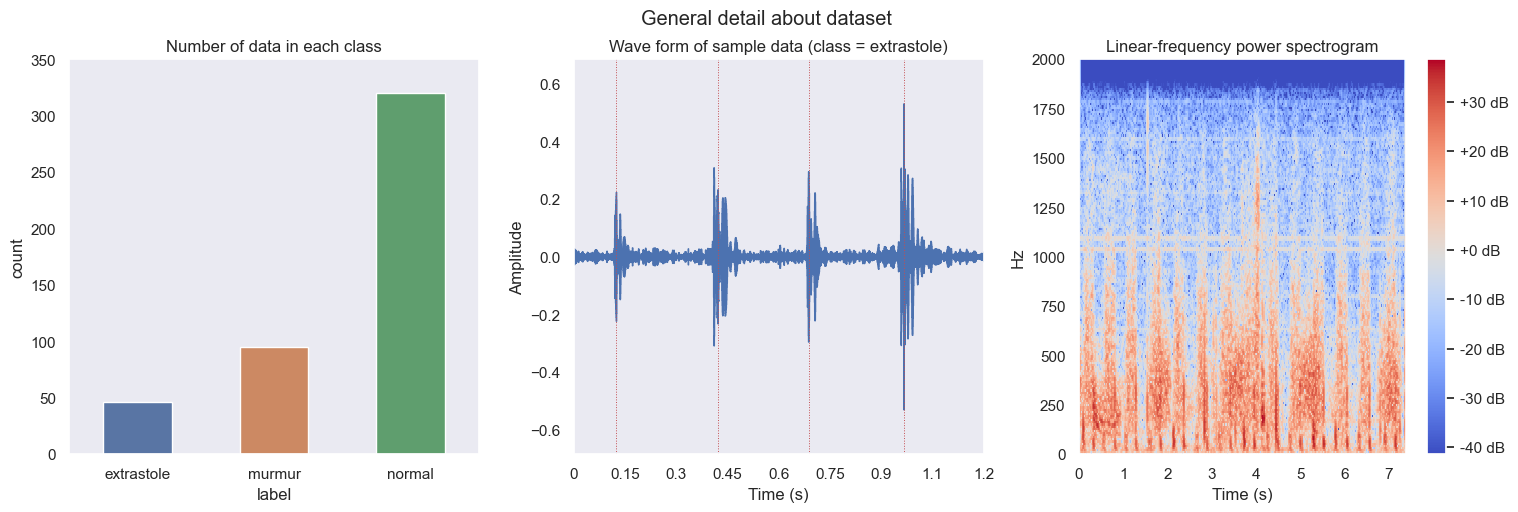

In [6]:
index = 10
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(w_pad=3.0)
fig.suptitle('General detail about dataset')
sb.set_theme(style="dark")
plt.subplots_adjust(top=0.88)
sb.countplot(data_b_path, ax=axes[0], x='label', width=0.5)

librosa.util.peak_pick

# plot number of dataset for each class
axes[0].set_title('Number of data in each class')
axes[0].set_ylim([0, 350])

# plot wave form and peak
peak_array, _ = scipy.signal.find_peaks(dataset.dataset[index][0], height=0.1, distance=0.2*dataset.dataset[index][1])
dataset.show_wave(index, ax=axes[1])
label = dataset.metadata['label'][index]
for eachpeak in peak_array:
    axes[1].axvline(x = eachpeak/dataset.dataset[index][1], color = 'r', 
                    ls=":", linewidth=0.7)
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('Time (s)')
axes[1].set_xlim([0.0, 1.2])
axes[1].set_title(f'Wave form of sample data (class = {label})')

spectrogram = dataset.show_spec(100, ax=axes[2], y_axis='linear', x_axis='time')
fig.colorbar(spectrogram, format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylim([0, 2000])

Note: dB shown in the graph is relative decibel (not absolute).

Notice: 
1. number of data in class **'normal'** is a lot more than **'murmur'** and **'extrastole'**. This may cause class imbalance when training the model later, if the dataset is not fed carefully.
2. In the spectrogram (the leftmost figure), there are constant fringe ~0 dB on *Frequency~750 Hz & ~1600 Hz*. This may be the static noise of the environment/device.

In [7]:
dataset.metadata

,dataset,fname,label,sublabel,bpm,peak-interval,peak-interval-timer
0,b,set_b/extrastole__127_1306764300147_C2.wav,extrastole,NaN,96.235913,"[0.2686167800453515, 0.352562358276644, 0.2744...","[0.1781859410430839, 0.4468027210884354, 0.799..."
1,b,set_b/extrastole__128_1306344005749_A.wav,extrastole,NaN,90.943461,"[0.2494331065759637, 0.37750566893424037, 0.25...","[0.2770068027210884, 0.5264399092970522, 0.903..."
2,b,set_b/extrastole__130_1306347376079_D.wav,extrastole,NaN,112.422248,"[0.2529251700680272, 0.26702947845804986, 0.25...","[0.15156462585034014, 0.40448979591836737, 0.6..."
3,b,set_b/extrastole__134_1306428161797_C1.wav,extrastole,NaN,105.416460,"[0.3017233560090703, 0.28122448979591835, 0.30...","[0.07968253968253969, 0.38140589569161, 0.6626..."
4,b,set_b/extrastole__138_1306762146980_B.wav,extrastole,NaN,74.039667,"[0.28834467120181406, 0.3871201814058957, 0.29...","[0.3514285714285714, 0.6397732426303855, 1.026..."
...,...,...,...,...,...,...,...
456,b,set_b/normal_noisynormal_284_1311168471850_A.wav,normal,noisynormal,96.614187,"[0.3818140589569161, 0.26099773242630386, 0.53...","[0.1110204081632653, 0.4928344671201814, 0.753..."
457,b,set_b/normal_noisynormal_284_1311168471850_B.wav,normal,noisynormal,99.657263,"[0.34607709750566895, 0.2582312925170068, 0.36...","[0.14331065759637188, 0.4893877551020408, 0.74..."
458,b,set_b/normal_noisynormal_285_1311169246969_C.wav,normal,noisynormal,68.588638,"[0.29931972789115646, 0.5092517006802721, 0.29...","[0.2965532879818594, 0.5958730158730159, 1.105..."
459,b,set_b/normal_noisynormal_296_1311682952647_C.wav,normal,noisynormal,118.700977,"[0.28086167800453515, 0.26988662131519275, 0.3...","[0.22136054421768708, 0.5022222222222222, 0.77..."


Text(0.5, 0.98, 'Distribution of Beat Per Minute (BPM) for each class')

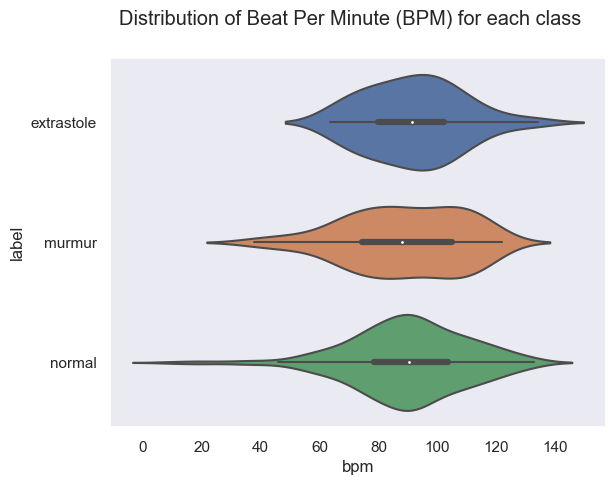

In [25]:
sb.violinplot(data=dataset.metadata, x="bpm", y="label")
plt.plot()
plt.suptitle('Distribution of Beat Per Minute (BPM) for each class')

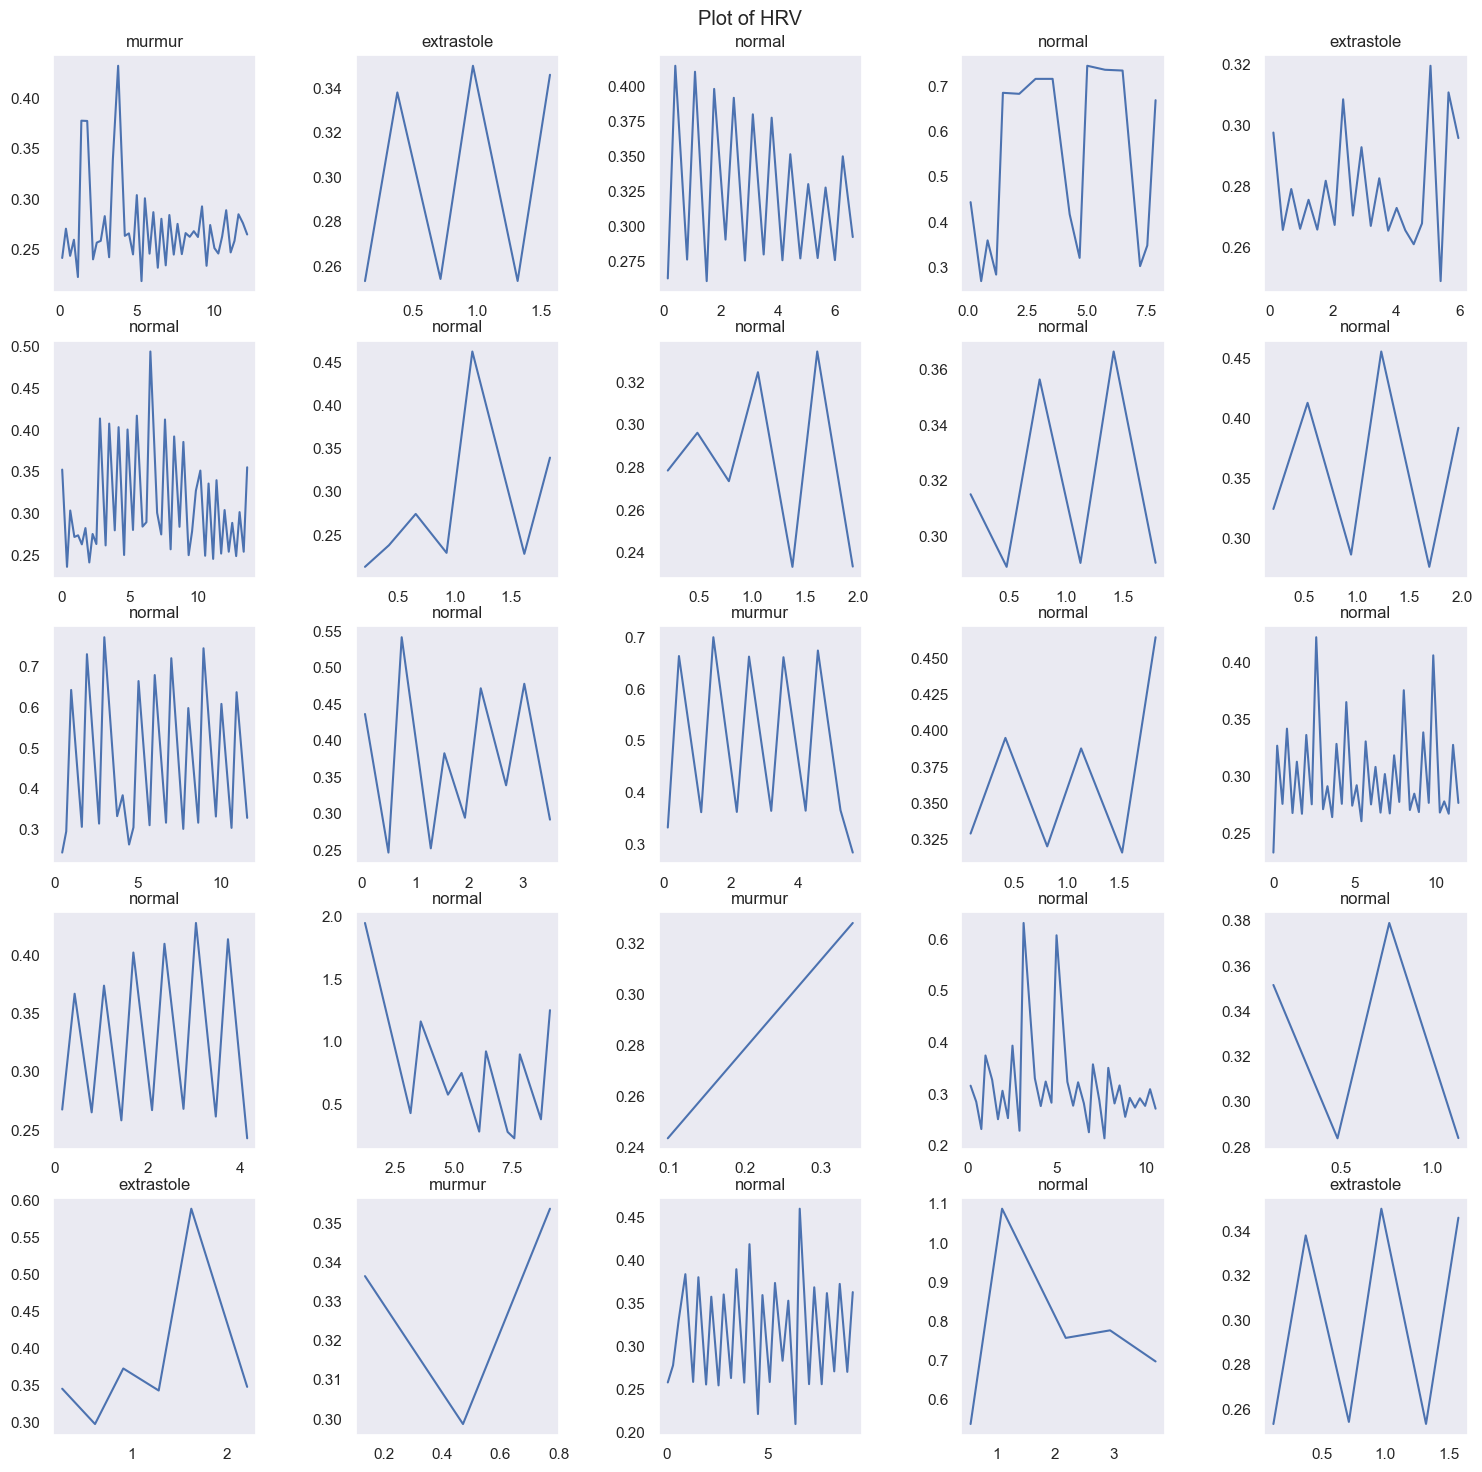

In [30]:
fig, axes = plt.subplots(5,5, figsize=(15, 15))
fig.tight_layout(w_pad=3.0)
fig.suptitle('Plot of HRV')
sb.set_theme(style="dark")
plt.subplots_adjust(top=0.95)
for i in range(25):
    loop = 0
    index = np.random.randint(len(dataset)-1)
    label = dataset.metadata['label'][index]
    axes[i//5, i%5].plot(dataset.metadata['peak-interval-timer'][index], dataset.metadata['peak-interval'][index])
    axes[i//5, i%5].set_title(f'{label}')